# Study of symmetric and asymmetric fission of Flevorium 

## Table of content 
* [Intructions on how to run the notebook](#run)
* [About this Notebook](#about)

* [Importing python packages](#import)

* [Read experimental data from file](#read)
    * [Analysis Code](#help1)
    * [Plotting the data](#plot)


* [Fit of data](#fit)
    * [Fitting Gaussians](#gaussian)
    * [Calculate Peak Area](#peak_area)
    * [Fit a line - Energy calibration](#line)


* [Statistical analysis - Error propagation](#stat)

## Instructions on how to run the notebook <a name="run"></a>


## About this Notebook <a name="about"></a>

The purpose of this _jupyter_ notebook is to introduce data analysis in the
frame of gamma spectroscopy. The example programming language is _Python3_, but
of course most coding languages can do the job properly. If you have never
programmed before there are so many great tutorials available across the web.
There even exist plenty _Open Online Courses_, e.g.
https://www.coursera.org/learn/python. Please have a look around for the one
that you like the best. However, note that you do not need to be an expert in
Python to pass the lab.

The data analysis can roughly be divided into four steps:
1. Read experimental data from file.
2. Fit Gaussians to peaks.
3. Calibrate the detector response.
4. Perform a statistical analysis (e.g. error propagation) and present results.

A dedicated python library, i.e. a folder with already written code, located in
`HelpCode`, have been implemented for the data analysis connected to the labs in
FYSC12 Nuclear Physics. The folder comprises functions that support 1-3 of the
above-mentioned steps.

Full Python3 coding examples of how to perform the different steps of the data
analysis is given below. Every example is finished with a template of how the
`HelpCode`-folder can be used to perform the same calculations.

**NOTE**: It is strongly recommended that you program your own functions instead
of using the framework directly out of the book. As you will find out, there
will come a point where the framework functionalities are not to your
satisfaction, and then you need to code yourself. So, better get used to it
right away :)

## Importing python packages<a name="import"></a>

In [1]:
import ROOT
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/04


## Extracting information from ROOT trees <a name="root"></a>

Extracting information from ROOT trees.

In [2]:
f = ROOT.TFile.Open("PICOSpec_run0_225_80_208.root")

rawTree = f.Get("PICO_tree_raw")

In [3]:
rawTree.Print()

******************************************************************************
*Tree    :PICO_tree_raw: TTree contain PICOSpec RAW event info                  *
*Entries :     2500 : Total =         1172437 bytes  File  Size =     947441 *
*        :          : Tree compression factor =   1.23                       *
******************************************************************************
*Br    0 :Mult      : Mult/I                                                 *
*Entries :     2500 : Total  Size=      10561 bytes  File Size  =       2416 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   4.17     *
*............................................................................*
*Br    1 :det_ID    : detector_ID[Mult]/I                                    *
*Entries :     2500 : Total  Size=     110480 bytes  File Size  =      51188 *
*Baskets :        4 : Basket Size=      32000 bytes  Compression=   2.15     *
*................................................

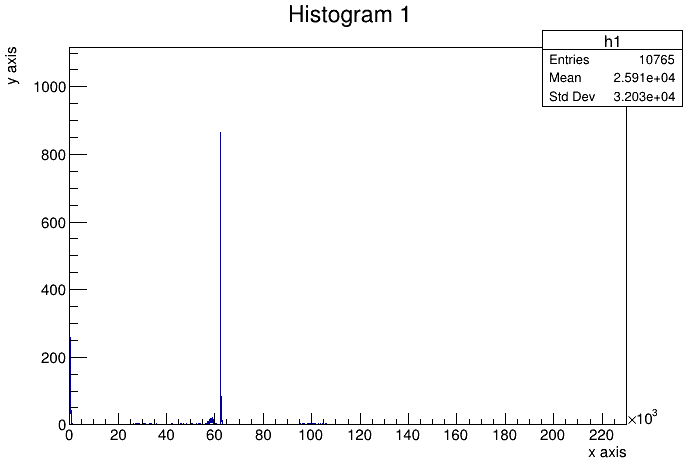

In [4]:
df = pd.DataFrame({'Event': [], 'Energy': [], 'DetID': []})
c1 = ROOT.TCanvas('c1', 'canvas title')
h1 = ROOT.TH1F("h1", 'Histogram 1; x axis; y axis', 10000, 0, 230000)
k=1
for event in rawTree:
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        #print('Detector ID: ', event.det_ID[i]) 
        df = df.append({'Event': k,'Energy': event.Energy[i], 'DetID': event.det_ID[i]}, ignore_index=True)
        #print(event.Energy[i])
        if 0 < event.det_ID[i] < 1024:
            #print(event.Energy[i])
            h1.Fill(event.Energy[i])
    k = k +1 
            

h1.Draw()
c1.Update()
c1.Draw()

In [5]:
df

,Event,Energy,DetID
0,1.0,97566.746735,593.0
1,1.0,493.497776,1685.0
2,1.0,85.434397,1208.0
3,1.0,689.590485,1209.0
4,1.0,143.874768,1888.0
...,...,...,...
24879,2500.0,374.063348,1438.0
24880,2500.0,69.742107,2065.0
24881,2500.0,88.202790,2064.0
24882,2500.0,99.201899,2070.0


<IPython.core.display.Javascript object>


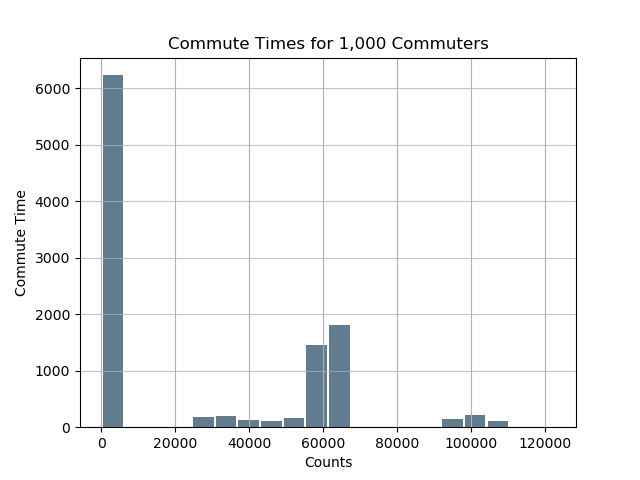

In [6]:


E_imp_histo = df.loc[df['DetID']<1024].Energy
#print(E_imp_histo)
E_imp_histo.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

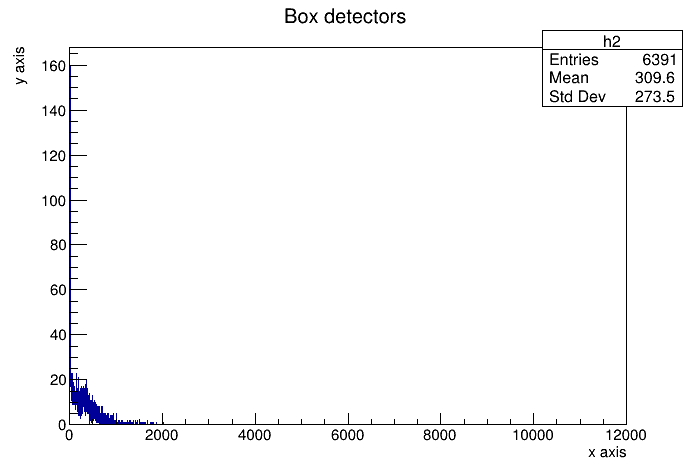

In [7]:
c2 = ROOT.TCanvas('c2', 'canvas title')
h2 = ROOT.TH1F("h2", 'Box detectors; x axis; y axis', 10000, 0, 12000)
for event in rawTree:
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 1024 < event.det_ID[i] < 2048:
            #print(event.Energy[i])
            h2.Fill(event.Energy[i])

h2.Draw()
c2.Update()
c2.Draw()
        

In [8]:
# E_arr_imp = []
# E_arr_box = []

# for event in rawTree:
#     E_imp = []
#     E_box = 0
#     #print(event.Energy, event.Mult) 
#     for i in range(event.Mult):
#         if 0 < event.det_ID[i] < 2048:
#             if 0 < event.det_ID[i] < 1024:  # event in implantation detector  
#                 E_imp = event.Energy[i]
#             if 1024 < event.det_ID[i] < 2048: # event in box detector
#                 E_box = event.Energy[i]
#     if (E_imp and E_box):
#         print(E_imp, E_box)
#         E_arr_imp.append(E_imp)
#         E_arr_box.append(E_box)


In [9]:
E_imp_final = []
E_box_final = []

for event in rawTree:
    print('New event')
    E_imp = []
    E_box = []
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 0 < event.det_ID[i] < 2048:
            if 0 < event.det_ID[i] < 1024:  # event in implantation detector  
                E_imp.append(event.Energy[i]) 
            if 1024 < event.det_ID[i] < 2048: # event in box detector
                E_box.append(event.Energy[i]) 
    if (E_imp and E_box):
        print(E_imp, E_box)
        E_imp_final.append(max(E_imp))
        E_box_final.append(max(E_box))
        

New event
[97566.74673538431, 191.3429520543803] [493.49777561008597, 85.43439723783969, 689.5904847945087, 143.87476773422517, 10.266082328225123]
New event
[29517.07457665425, 32985.444648023324, 339.9099551132186, 19.304606265578705, 282.8799451268006, 56881.56111130846] [315.34334218213104, 825.4274993564229]
New event
[62777.02323493585, 6.7018783362294165, 3.7708342636550385, 40525.70649746806] [420.6098086600676, 580.8810886742598]
New event
[99152.1913279063, 85.41666432942272] [426.431811908706, 70.88701378156239, 14.063066057127728, 2.2657416548075386, 393.18674753555524]
New event
New event
[102404.77164703996] [329.4331460786233, 166.65734535945995, 467.26761790810485, 802.0865568722531]
New event
New event
[62744.74642009327, 235.5647545793226, 289.3137028569183, 330.1714207087601, 57304.10292361878] [2.897082108298569]
New event
[62568.80806364748, 112.13239730516445, 572.3949481314124, 67.83015256413779, 743.3176130216862, 38.72020825315128, 59265.48901513798] [725.25669

[62506.17396789394, 679.3530420010785, 110.06635086091343, 304.0051086270434, 598.32921330595, 57692.98463922813] [325.13159090472607]
New event
[53217.91508338295, 185.6972833799972, 42.86437247030669, 57362.85058924623] [133.52512837782112, 182.73626255719302, 135.85377346854835]
New event
[62566.939390549785, 118.04780086162295, 267.03875306196863, 41408.92620741039] [275.7745304738944, 589.3820032099592, 962.4114427036554, 10.266082123139052, 58.944646724828694, 21.438792080298807, 24.4623890440619, 11.92029930869219]
New event
[105039.60537448012, 8.730068676718691] [113.0767881515904, 354.319316613362, 433.2140128893528]
New event
[62500.84291357135, 39.48268498894755, 59012.80985178994] [440.21860306919257, 710.5450172925639, 17.685243266860777, 512.229403349753, 1070.1723357986139]
New event
[62519.38364328771, 195.46179586971974, 119.19224647981132, 50921.93184081528] [433.6150556942681, 19.430274801829647, 730.5089526804484]
New event
[62501.567420424624, 355.2678636917421, 4

New event
[63034.901423991825, 14.723590443938557, 39.826720206480026, 1.1867820159662645, 59676.525463547136] [453.1901903278927, 200.73402251364539, 2.3340941330113383]
New event
[62719.01538181579, 374.386249267065, 161.72118882252957, 42.11748144178787, 34.72827876114449, 5.658958958086511, 38064.473739205554] [20.51443550014452, 24.958185945004047, 203.43892117314184]
New event
[62502.88072173136, 47.787206907825066, 553.9870567781545, 36272.466685689404] [112.01249070841492, 332.96690414332807, 22.498283383937963, 257.43988435049135, 144.0122352482498]
New event
[102647.90631125351] [37.25913383229399, 443.0231218090928, 16.321545746578536, 590.1071600978437, 253.60315320499328, 350.50498049519985]
New event
[62548.7409086523, 534.9739235058995, 25.144986619663545, 174.8998843253863, 314.81566796791105, 239.86065967277116, 286.9627402424759, 48223.95225655399] [1102.9197064881535, 121.46539802059412]
New event
[103002.0969306758] [620.0598165158584, 5.68818121346645, 43.480265306

New event
[62735.92051440107, 259.2688062433152, 58611.107195364944] [22.787602224761102]
New event
New event
New event
[62500.0, 471.32121044794866, 175.3746396342516, 93.97943288851674, 38.99284512909842, 5.8541057523250215, 58941.75609953249] [32.6955650863482, 73.19973711609512, 287.2897731744207, 391.6897443387713, 98.53755238112967]
New event
[62594.035513287985, 89.62095872738522, 5.839910926260279, 58210.24035549907] [470.03706856691167, 12.544666643020465, 112.093384659783, 981.7275094698746]
New event
[62541.60582750867, 190.64605811238653, 232.94661234984235, 3.8465129774335134, 305.6803055488048, 59660.306156312596] [517.3319980784813]
New event
[51749.02416415773, 18.04968420275768, 236.17747686816273, 274.7881283776156, 59756.78226198478] [333.83368396848186, 86.27238339403765]
New event
[53271.723114426255, 8.87235139334832, 34.79847705716884, 58760.35795416845] [233.37174279553105, 429.1457761835827]
New event
[62503.433120948444, 195.3688736920839, 542.8833060791047, 2

[62502.42229756612, 247.311161927077, 29.314989673552756, 223.3153364117437, 57713.118533199966] [424.0819936167431, 9.021120479818261, 731.02521826217, 148.3289069117721, 262.64466622554056]
New event
[104422.17178255954, 214.37763094911134, 135.08511840616168, 72.45839312986216, 1014.8965504372676, 2.3607513173273316] [772.0360924539987, 402.5064771650934]
New event
[62500.18705448259, 213.06868274399937, 642.574896843207, 59.94745367411229, 57273.93463561012] [394.9609766583697, 737.3587600387874]
New event
[62664.34537797191, 39.83742529041378, 1.9637957958549408, 60034.15956667113] [518.8913473820942, 152.25574365884785]
New event
New event
[62850.19739786368, 457.2633612600161, 59.16795886486324, 4.023188147744532, 31693.3130286303] [493.8128527280229]
New event
[105140.76320200688] [136.522799241457, 559.5472088195629, 22.391346996438003, 898.6211455232182, 151.5032612520041, 381.5171676750062]
New event
[62555.81102740469, 232.3949014756485, 2.698071061745194, 32559.23446850347

[52723.74861580575, 93.950508299554, 56319.20592317048] [149.980312422056, 108.42455528637714, 453.30115378557514]
New event
[62500.78189811515, 106.43364365597198, 115.19874344754565, 66.06637404792754, 190.26452374132484, 59083.636452213446] [683.5669911952355, 480.24465567777986]
New event
[62715.22830994004, 996.3708158167586, 42.171373181975504, 124.88190893124742, 395.57580000147595, 57500.351634061255] [430.3374045499716, 438.6817750919155, 10.266111187667088]
New event
[62722.83789274526, 169.7010212188571, 204.0240282773513, 8.18450400060429, 60074.60438324131] [502.4001139195785]
New event
[62513.280399151336, 61.98886946810678, 278.0437550238775, 156.83798991914512, 54535.73026938882] [324.10687592136696, 265.0331262301259, 203.7049871462793, 144.53325418887923, 89.3814788514663]
New event
[97413.09752006028] [13.569593048363199, 34.46147561128905]
New event
[62517.73644828479, 487.09767051268346, 206.02917146038456, 32172.32855184131] [426.9374371328698, 12.27490951227524, 

New event
New event
[62574.098805773516, 425.8547893443535, 409.66653079130606, 621.8445983059656, 59201.20692847416] [201.27486058928784, 512.9963823987825, 352.5584323277189, 10.266095081731342]
New event
[62500.0, 4.860549274802508, 74.71181669330633, 325.08797788185717, 36242.41263454202] [350.83613882513106]
New event
[54335.89502668225, 257.5407865371435, 494.4489323767807, 380.41754963799934, 292.4467673509428, 362.48208169885606, 57203.5984009154] [535.107012432393, 1087.2509945730997, 201.0636843599483, 10.266097279955854]
New event
New event
[102705.20812599214, 429.60820969108096] [363.0961608100729, 219.87484985338867, 74.97221055317793, 17.120098474198848, 70.31203822819009]
New event
[62501.788961683254, 91.93018129044493, 514.7822956876969, 58323.496418391514] [123.93894286240445, 270.67404218415277]
New event
New event
[98460.67214107815, 43.83644449408246] [246.44566019681386, 681.6648555405767, 1003.5727460653185, 480.3303047136363, 90.46058686945537]
New event
[10517

[104867.56147767037] [809.814541973731, 129.25003837053868]
New event
[59010.798724331835, 72.85304228007047, 57096.72239331061] [537.603952164587, 595.2592642399038, 10.266088627537632, 12.274882773308564, 928.1390981596418]
New event
[62786.745226220606, 239.59592588565792, 205.07784122864894, 32419.94026592127] [359.2439632861385]
New event
[62614.75024754378, 216.91949798779817, 153.55839799621646, 179.80078155292406, 132.31047935282598, 127.88336327530527, 300.1114880759122, 31197.36900316897] [142.9128221108863, 4.966453939110891, 390.860443802538]
New event
[62503.163713857626, 86.69330771787459, 13.735706985832087, 32415.247921911257] [633.4249853652814, 32.1271407621711, 438.68508495445235, 56.95147709282517, 127.77530715938259, 393.78698968545746]
New event
[62510.615117370566, 502.9453430352369, 407.58157134724195, 88.46193617610258, 379.66979730026924, 618.6319741037305, 26469.15613323215] [361.95889997695815, 832.3976564714428]
New event
[98864.5721724494] [339.32555691700

[62519.07287074665, 49.86249307561486, 234.88170241399857, 61187.05456208029] [299.0653074735159, 62.204664585860336, 476.3115623047747]
New event
[63012.082918361346, 106.83578225154962, 5.581480307623243, 27252.843432185506] [809.3469877227081, 149.27946908881054, 163.89046117404206, 341.37796093142794, 920.9757955823957]
New event
New event
New event
New event
[62642.03069889656, 108.8578031244425, 129.19188611537155, 3.5112394548096315, 58970.427330316365] [265.4543160713679, 243.94653441956027, 403.9538171237338]
New event
[62700.727646996704, 501.76414168507443, 49.97597493640566, 183.75552776097757, 14.42250086710484, 57943.59666300864] [102.98018657773952, 12.274877717727321, 533.0457781632183]
New event
[62504.226138851365, 43.68842663472376, 2.8456875099636867, 58923.48025096825] [476.9089766095719, 234.88331774468523, 526.2005231493657, 485.2285087078471]
New event
[105949.25034932344] [478.8692036429273]
New event
[62506.35599877341, 276.9714799780083, 490.53410562398153, 3

[62819.26349699749, 128.00053657883072, 265.83238893202616, 491.32482537126265, 7.554610163483217, 28656.24845462] [270.9637919412762, 446.4796426879712, 84.82446869941163, 162.42506855035467, 189.23050333474782]
New event
[96672.20044611073] [716.0172569566563, 3.8836922288671274, 12.195402422600155]
New event
[62509.885280560986, 303.01813051815367, 53.364513633061875, 10.006562269131916, 8.885598236493632, 69.45831812600592, 58372.19359381631] [24.624038823755065, 332.2916744757981]
New event
[62505.475341748344, 154.9481543045793, 583.9529244559287, 197.20035576406332, 5.285693938512946, 38008.38413452602] [211.35801318487097, 173.6312575103874, 656.38167672964]
New event
[62504.113986011995, 43.2485498240144, 449.163717875883, 58186.3716811369] [543.3929596986062, 789.2576023714812]
New event
[103326.18692921581] [284.0878182293256, 910.285763053573, 372.99749109722853, 84.1952235962333]
New event
[63223.05452407585, 2.5457588467986603, 4.355847845342989, 445.8516685843241, 59147.

[97830.07930195473] [333.8748118898698, 608.460441447716, 531.2238548213112, 113.6930444427553]
New event
New event
[62510.767297389604, 582.435720922363, 492.93050381168945, 17.992258305731863, 149.41678133485408, 153.66762991553304, 129.42219170450156, 5.001707112734769, 59399.10643809949] [344.9329446204883, 511.0996800243852, 16.355612062608078]
New event
[62664.590194484255, 102.8960051484257, 241.71879938410552, 40559.570655595024] [366.0358080504062, 144.9255778150884, 4.373888212774185]
New event
[62504.24367586503, 85.46571934005416, 32.20360260679173, 844.9518896499358, 12.541129625743437, 34215.40121074917] [288.5629438808516, 177.9544827874039]
New event
[62733.78340364746, 45.31724155944993, 6.95723957837882, 57989.38637859349] [615.2652472803709, 111.3644992666979, 28.35155460352568]
New event
[62705.266103003516, 44.83752849654966, 308.9316711028742, 49.46949802085776, 59226.141584404264] [48.48665999356367]
New event
[62507.72907311651, 292.70415133811764, 5.41189398013

[62503.03806215833, 47.9792419271706, 468.63522830068007, 92.09082646165913, 499.10989673736907, 57397.10101601274] [10.26610243849831, 183.2933542978122]
New event
New event
[62500.0, 8.540535588272666, 102.31700243443163, 90.46910108868968, 53.70797225737606, 155.3430178624096, 58067.22250988241] [395.32239212212323]
New event
[62902.52424184983, 3.775044215272713, 1.9396974781028826, 59348.48357696562] [292.99168479260607, 935.4883834370067, 959.4735832778426]
New event
[62733.08216420463, 0.596212718853961, 150.13386879493837, 9.25751953497778, 26.53919178431245, 171.1339362341672, 58825.377737491326] [360.77437750798083]
New event
[62500.85921055654, 136.46962478532174, 150.89661040912924, 39.97924349171422, 516.5249877695821, 59294.145326564714] [261.2544174985182, 45.380077176842036]
New event
[62501.64063510567, 86.15307896176283, 96.32588435726421, 47743.363985398566] [40.7447317826622, 70.59504073284094, 335.31985103446607]
New event
[62500.0, 143.3903214926258, 242.582485576

<IPython.core.display.Javascript object>


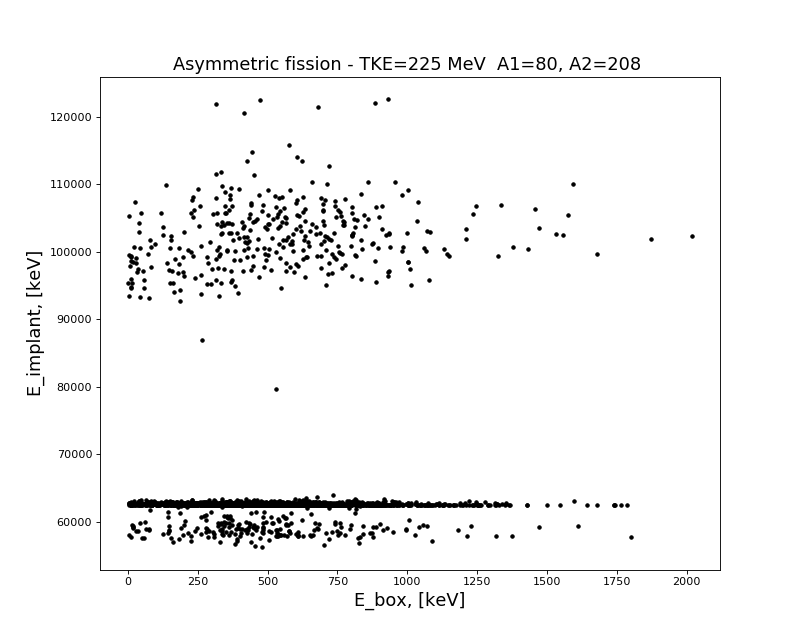

For N=2500 runs


In [10]:

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(E_box_final, E_imp_final, '.', color='black');
plt.title('Asymmetric fission - TKE=225 MeV  A1=80, A2=208 ', fontsize=16)
plt.xlabel('E_box, [keV]', fontsize=16)
plt.ylabel('E_implant, [keV]', fontsize=16)

print("For N=2500 runs")

In [18]:
kkk = df.loc[df['DetID']<1024]
kkk

,Event,Energy,DetID
0,1.0,97566.746735,593.0
6,1.0,191.342952,958.0
10,2.0,29517.074577,400.0
11,2.0,32985.444648,401.0
13,2.0,339.909955,400.0
...,...,...,...
24858,2499.0,62602.672758,432.0
24859,2499.0,313.980368,464.0
24864,2499.0,39.837417,432.0
24871,2499.0,60407.708241,432.0


In [26]:
df_imp = df.loc[df['DetID']<1024].groupby(['Event'], sort=False).Energy.max()
df_imp

Event
1.0        97566.746735
2.0        56881.561111
3.0        62777.023235
4.0        99152.191328
5.0        62502.394594
              ...      
2496.0     62506.158774
2497.0     62510.000577
2498.0     62503.788280
2499.0     62602.672758
2500.0    104073.343642
Name: Energy, Length: 2499, dtype: float64

In [48]:
df_box = df.loc[(df['DetID']>1024) & (df['DetID']<2048)]

In [49]:
df_box = df_box.groupby(['Event'], sort=False).Energy.max()
df_box

Event
1.0       689.590485
2.0       825.427499
3.0       580.881089
4.0       426.431812
6.0       802.086557
             ...    
2496.0    306.260841
2497.0    222.542302
2498.0    481.292897
2499.0    321.902074
2500.0    374.063348
Name: Energy, Length: 2198, dtype: float64

<IPython.core.display.Javascript object>


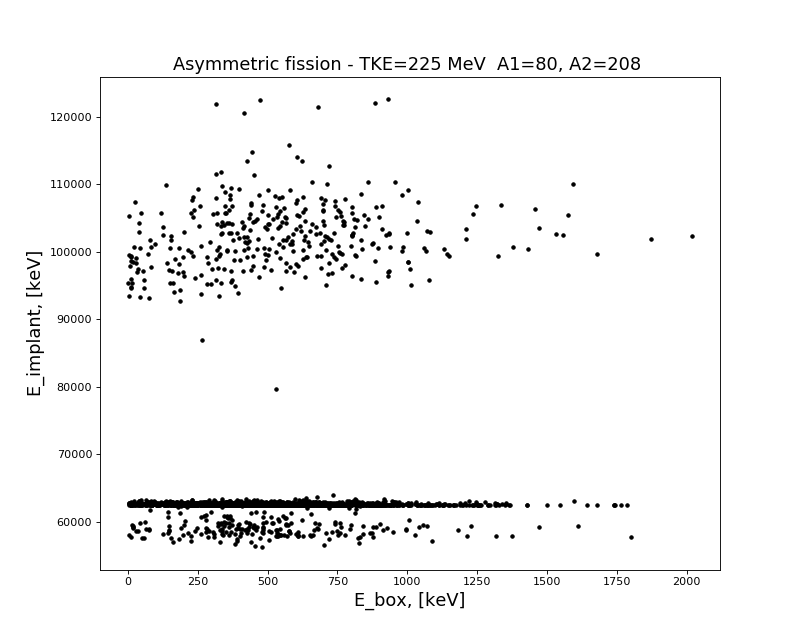

For N=2500 runs


In [50]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(E_box_final, E_imp_final, '.', color='black');
plt.title('Asymmetric fission - TKE=225 MeV  A1=80, A2=208 ', fontsize=16)
plt.xlabel('E_box, [keV]', fontsize=16)
plt.ylabel('E_implant, [keV]', fontsize=16)

print("For N=2500 runs")